# Estimation of tree height using GEDI dataset
## GEDI features

The Global Ecosystem Dynamics Investigation (GEDI) mission aims to characterize ecosystem structure and dynamics to enable radically improved quantification of biomass. The GEDI instrument, attached to the International Space Station (ISS), collects data globally between 51.6° N and 51.6° S latitudes at the highest resolution and densest sampling of the 3-dimensional structure of the Earth.

GEDI's Level 2A Geolocated Elevation and Height Metrics Product (GEDI02_A) is primarily composed of Relative Height (RH) metrics of canopy height stored at different percentile.

The GEDI02_A product is provided in HDF5 format and has a spatial resolution (average footprint) of 25 meters. The GEDI02_A data product contains 156 layers for each of the eight beams, including ground elevation, canopy top height, relative return energy metrics (e.g., canopy vertical structure), and many other interpreted products from the return waveforms. 


The [GEDI_Subsetter.py](https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-subsetter/browse) allows the conversion of the HDF5 format in to txt files. 
During the conversion several parameters can be extracted. The full list can be found at https://lpdaac.usgs.gov/documents/982/gedi_l2a_dictionary_P003_v2.html , and a general description is stored at https://lpdaac.usgs.gov/documents/986/GEDI02_UserGuide_V2.pdf







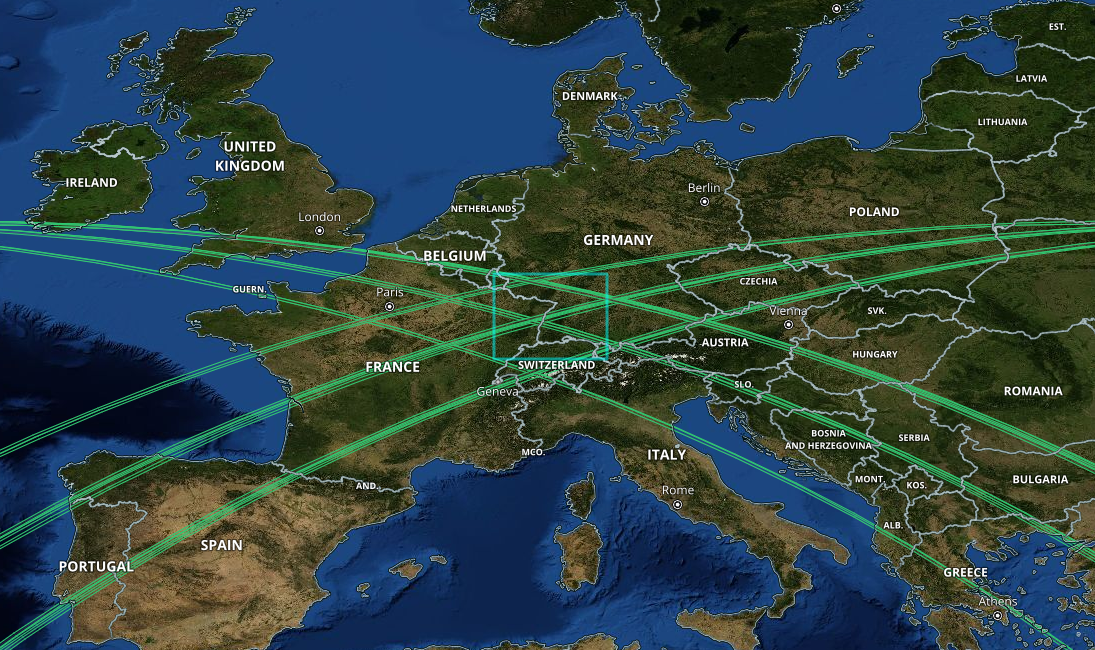

In [2]:
from IPython.display import Image
import rasterio
from rasterio import *
from rasterio.plot import show
from rasterio.plot import show_hist
import geopandas
import pandas as pd
from matplotlib import pyplot

Image("../images/tree_height_path_map.png" , width = 500, height = 300)

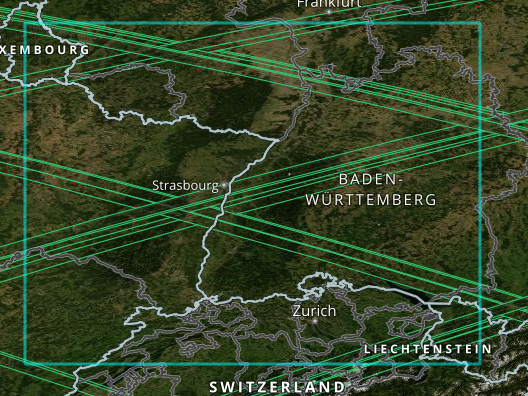

In [2]:
Image("../images/tree_height_study_area.png")

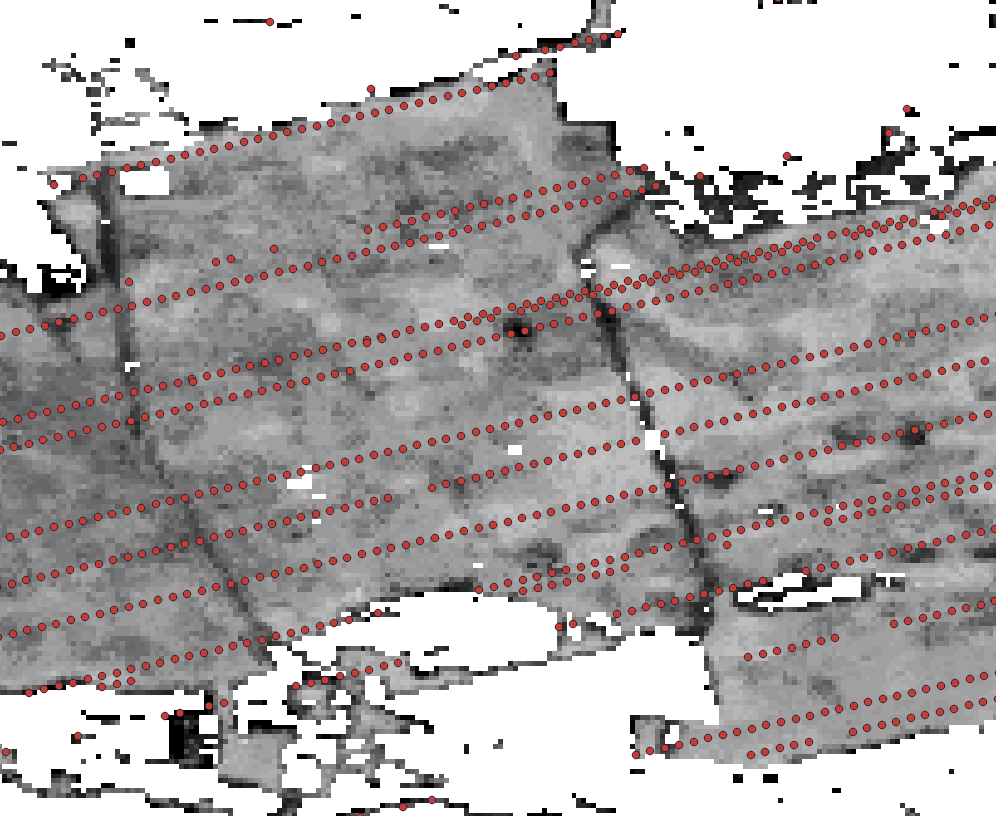

In [14]:
Image("../images/tree_height_study_area_selected.png" , width = 600, height = 300)

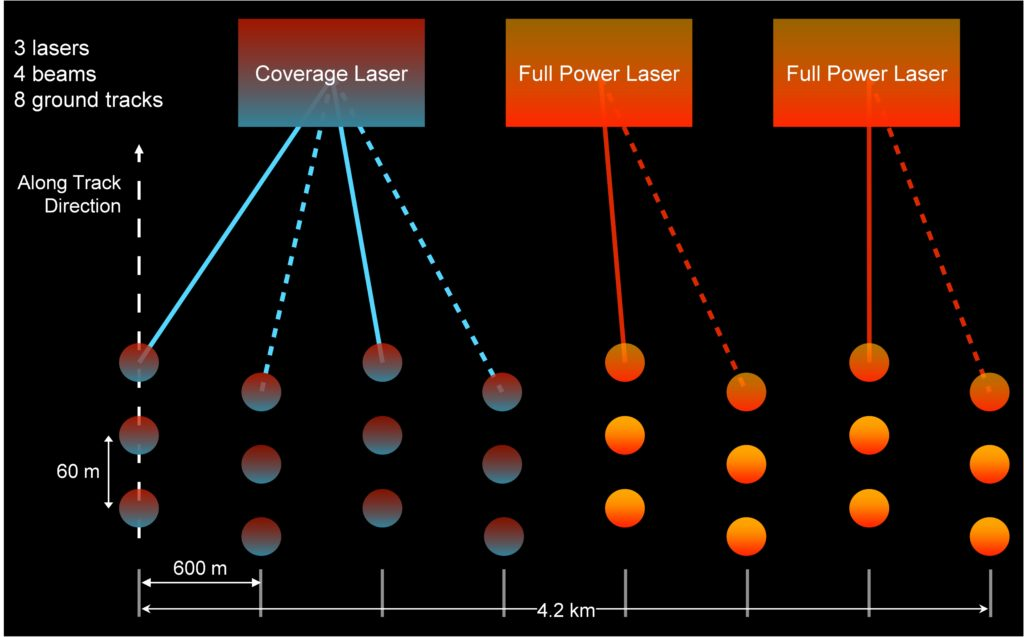

In [3]:
Image("../images/tree_hehght_beam.jpg" , width = 500, height = 300)

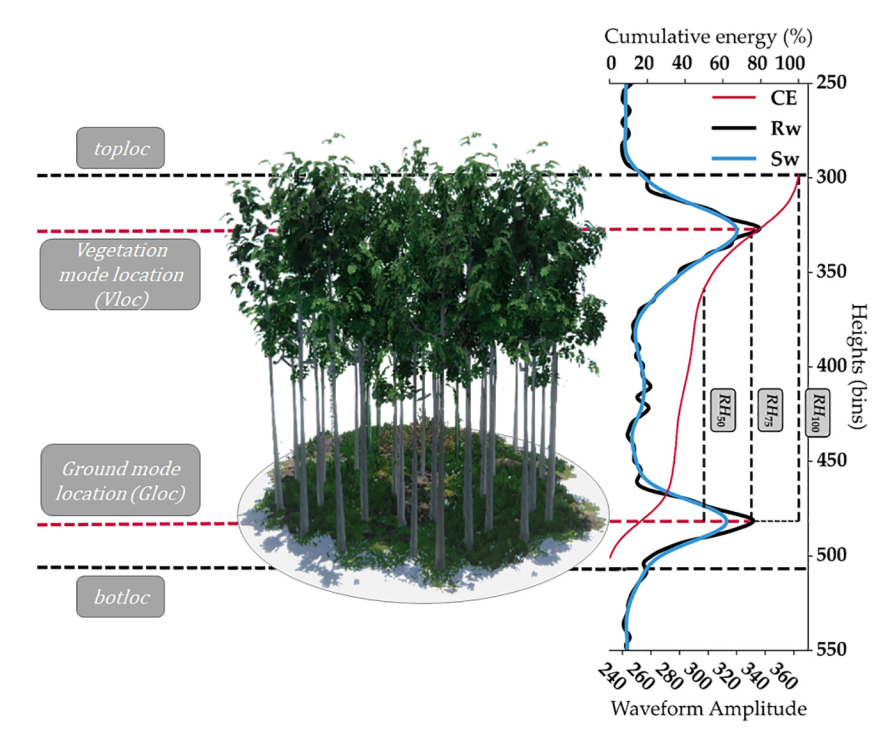

In [4]:
Image("../images/tree_height_pulse_distribution.png", width = 600, height = 300)

## Data presentation

**Available txt files.**

In [7]:
! ls tree_height/txt/*

tree_height/txt/eu_x_y_height_select.txt
tree_height/txt/eu_x_y_predictors_select.txt
tree_height/txt/eu_x_y_select.txt
tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt


In [8]:
! wc -l tree_height/txt/*

  1267240 tree_height/txt/eu_x_y_height_select.txt
  1267240 tree_height/txt/eu_x_y_predictors_select.txt
  1267239 tree_height/txt/eu_x_y_select.txt
  1267240 tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt
  5068959 total


**File storing point location (longitude and latitude). Such file can be used with "gdallocationinfo" to extract enviromental predictor at each point.** 

In [9]:
! head tree_height/txt/eu_x_y_select.txt

6.050001 49.727499
6.0500017 49.922155
6.0500021 48.602377
6.0500089 48.151979
6.0500102 49.58841
6.0500143 48.608456
6.0500165 48.571401
6.0500189 49.921613
6.0500201 48.822645
6.0500238 49.847522


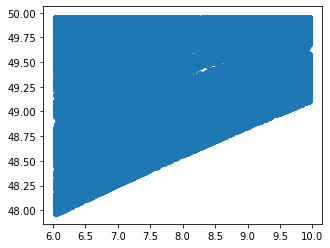

In [11]:
points = geopandas.read_file("tree_height/geodata_vector/eu_x_y_height_select.gpkg")
points.plot()

**File storing tree hight (cm) obtained by 6 algorithms, with their associate quality flag.**
 * a?_95:  tree hight (cm) at 95 quintile, for each algorithm
 * min_rh_95: minimum value of tree hight (cm) ammong the 6 algorithms 
 * max_rh_95: maximum value of tree hight (cm) ammong the 6 algorithms
 * BEAM: 1-4 coverage beam = lower power (worst) ; 5-8 power beam = higher power (better) 
 * digital_elev: digital mdoel elevation
 * elev_low: elevation of center of lowest mode
 * qc_a?: quality_flag for six algorithms quality_flag = 1 (better)
 * se_a?: sensitivity for six algorithms sensitivity < 0.95 (worse)  ;  sensitivity > 0.95  (beter ) 
 * deg_fg: (degrade_flag) not-degraded 0 (better) ;  degraded > 0 (worse);
 * solar_ele: solar elevation. > 0 day (worse); < 0 night (better)

In [11]:
! head tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt

ID X Y a1_95 a2_95 a3_95 a4_95 a5_95 a6_95 min_rh_95 max_rh_95 BEAM digital_elev elev_low qc_a1 qc_a2 qc_a3 qc_a4 qc_a5 qc_a6 se_a1 se_a2 se_a3 se_a4 se_a5 se_a6 deg_fg solar_ele
1 6.050001 49.727499 3139 3139 3139 3120 3139 3139 3120 3139 5 4.1e+02 383.72153 1 1 1 1 1 1 0.962 0.984 0.968 0.962 0.989 0.979 0 17.7
2 6.0500017 49.922155 1022 2303 970 872 5596 1524 872 5596 5 2.9e+02 2374.1411 0 0 0 0 0 0 0.948 0.990 0.960 0.948 0.994 0.980 0 43.7
3 6.0500021 48.602377 380 1336 332 362 1336 1340 332 1340 4 4.4e+02 435.97781 1 1 1 1 1 1 0.947 0.975 0.956 0.947 0.981 0.968 0 0.2
4 6.0500089 48.151979 3153 3142 3142 3127 3138 3142 3127 3153 2 4.5e+02 422.00537 1 1 1 1 1 1 0.930 0.970 0.943 0.930 0.978 0.962 0 -14.2
5 6.0500102 49.58841 666 4221 651 33 5611 2723 33 5611 8 3.7e+02 2413.7483 0 0 0 0 0 0 0.941 0.983 0.946 0.941 0.992 0.969 0 22.1
6 6.0500143 48.608456 787 1179 1187 761 1833 1833 761 1833 3 4.2e+02 415.51581 1 1 1 1 1 1 0.952 0.979 0.961 0.952 0.986 0.975 0 0.2
7 6.0500165 48.571

In [29]:
height_6algorithms = pd.read_csv("tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt", sep=" ",  index_col=False)
pd.set_option('display.max_columns',None)
height_6algorithms.head(6)

ID         X          Y  a1_95  a2_95  a3_95  a4_95  a5_95  a6_95  \
0   1  6.050001  49.727499   3139   3139   3139   3120   3139   3139   
1   2  6.050002  49.922155   1022   2303    970    872   5596   1524   
2   3  6.050002  48.602377    380   1336    332    362   1336   1340   
3   4  6.050009  48.151979   3153   3142   3142   3127   3138   3142   
4   5  6.050010  49.588410    666   4221    651     33   5611   2723   
5   6  6.050014  48.608456    787   1179   1187    761   1833   1833   

   min_rh_95  max_rh_95  BEAM  digital_elev    elev_low  qc_a1  qc_a2  qc_a3  \
0       3120       3139     5         410.0   383.72153      1      1      1   
1        872       5596     5         290.0  2374.14110      0      0      0   
2        332       1340     4         440.0   435.97781      1      1      1   
3       3127       3153     2         450.0   422.00537      1      1      1   
4         33       5611     8         370.0  2413.74830      0      0      0   
5        761       1833     3         420.0   415.51581      1      1      1   

   qc_a4  qc_a5  qc_a6  se_a1  se_a2  se_a3  se_a4  se_a5  se_a6  deg_fg  \
0      1      1      1  0.962  0.984  0.968  0.962  0.989  0.979       0   
1      0      0      0  0.948  0.990  0.960  0.948  0.994  0.980       0   
2      1      1      1  0.947  0.975  0.956  0.947  0.981  0.968       0   
3      1      1      1  0.930  0.970  0.943  0.930  0.978  0.962       0   
4      0      0      0  0.941  0.983  0.946  0.941  0.992  0.969       0   
5      1      1      1  0.952  0.979  0.961  0.952  0.986  0.975       0   

   solar_ele  
0       17.7  
1       43.7  
2        0.2  
3      -14.2  
4       22.1  
5        0.2

In [33]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
height_6algorithms.describe()

ID          X          Y      a1_95      a2_95      a3_95  \
count 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean   633620.00       7.97      49.37    1807.40    2164.35    1885.92   
std    365820.53       1.10       0.47    1034.72    1107.12    1013.52   
min         1.00       6.05      47.98     115.00      82.00      37.00   
25%    316810.50       7.03      49.06     882.00    1474.00    1095.00   
50%    633620.00       7.84      49.51    1899.00    2240.00    1960.00   
75%    950429.50       8.98      49.73    2590.00    2817.00    2626.00   
max   1267239.00       9.95      49.95   14359.00   16070.00   14469.00   

           a4_95      a5_95      a6_95  min_rh_95  max_rh_95       BEAM  \
count 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean     1587.37    2692.24    2129.05    1582.89    2703.53       4.75   
std      1058.24    1310.33    1045.41    1056.13    1322.65       2.29   
min         3.00      78.00      82.00       3.00     116.00       1.00   
25%       488.00    1921.00    1457.00     486.00    1928.00       3.00   
50%      1650.00    2706.00    2230.00    1644.00    2711.00       5.00   
75%      2472.00    3414.00    2812.00    2468.00    3416.00       7.00   
max     13620.00   18000.00   18299.00   13620.00   18299.00       8.00   

       digital_elev   elev_low      qc_a1      qc_a2      qc_a3      qc_a4  \
count    1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean         289.22     491.06       0.80       0.91       0.85       0.80   
std        10363.92     528.74       0.40       0.28       0.35       0.40   
min     -1000000.00     114.87       0.00       0.00       0.00       0.00   
25%          320.00     309.49       1.00       1.00       1.00       1.00   
50%          390.00     386.05       1.00       1.00       1.00       1.00   
75%          470.00     476.89       1.00       1.00       1.00       1.00   
max         1200.00    8566.18       1.00       1.00       1.00       1.00   

           qc_a5      qc_a6      se_a1      se_a2      se_a3      se_a4  \
count 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00 1267239.00   
mean        0.92       0.90       0.93       0.97       0.95       0.93   
std         0.26       0.30       0.44       0.19       0.36       0.44   
min         0.00       0.00    -411.76    -178.46    -339.98    -411.76   
25%         1.00       1.00       0.92       0.97       0.94       0.92   
50%         1.00       1.00       0.95       0.98       0.96       0.95   
75%         1.00       1.00       0.97       0.99       0.97       0.97   
max         1.00       1.00     181.09      84.12     153.38     181.09   

           se_a5      se_a6     deg_fg  solar_ele  
count 1267239.00 1267239.00 1267239.00 1267239.00  
mean        0.98       0.96      12.46      -1.33  
std         0.14       0.25      25.89      30.75  
min      -124.62    -232.30       0.00     -63.60  
25%         0.98       0.96       0.00     -23.40  
50%         0.99       0.97       0.00      -4.90  
75%         0.99       0.98       0.00      23.30  
max        63.34     111.83      80.00      64.00

Count observation during the day (>0) and during the night (<0)

In [40]:
(height_6algorithms["solar_ele"] < 0).sum()   # night (better)

700460

In [41]:
(height_6algorithms["solar_ele"] > 0).sum()   # day (worse)

566779

Count uniq degraged (>0) or not-degraded (0) observation

In [36]:
height_6algorithms["deg_fg"].value_counts()

0     967716
70    139223
30     48378
5      44063
80     42052
50     16666
9       5815
71      1406
1       1368
35       481
39        71
Name: deg_fg, dtype: int64

In [ ]:
height_6algorithms["solar_ele"].value_counts()

**File storing point location and tree height. The height is obtained as average of the 4 algorithms.**
Among the 6 algorithms we calculate minimum and maximum value and we calculate mean excluding them. 

In [10]:
! head tree_height/txt/eu_x_y_height_select.txt  

ID X Y h
1 6.050001 49.727499 3139
2 6.0500017 49.922155 1454.75
3 6.0500021 48.602377 853.5
4 6.0500089 48.151979 3141
5 6.0500102 49.58841 2065.25
6 6.0500143 48.608456 1246.5
7 6.0500165 48.571401 2938.75
8 6.0500189 49.921613 3294.75
9 6.0500201 48.822645 1623.5


**Available geo raster files.**

In [13]:
! ls tree_height/geodata_raster

BLDFIE_WeigAver.tif    glad_ard_SVVI_med.tif
CECSOL_WeigAver.tif    glad_ard_SVVI_min.tif
CHELSA_bio18.tif       latitude.tif
CHELSA_bio4.tif        longitude.tif
convergence.tif        northness.tif
cti.tif		       ORCDRC_WeigAver.tif
dev-magnitude.tif      outlet_dist_dw_basin.tif
eastness.tif	       SBIO3_Isothermality_5_15cm.tif
elev.tif	       SBIO4_Temperature_Seasonality_5_15cm.tif
forestheight.tif       treecover.tif
glad_ard_SVVI_max.tif


### Geo raster files description.

**Spectral Variability Vegetation Index obtained from the [GLAD ARD](https://glad.umd.edu/ard/glad-landsat-ard-tools) dataset.** 

* glad_ard_SVVI_min.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal minimum composite. 
* glad_ard_SVVI_med.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal median composite.
* glad_ard_SVVI_max.tif: Spectral Variability Vegetation Index colculated using a 3 years temporal maximum composite.

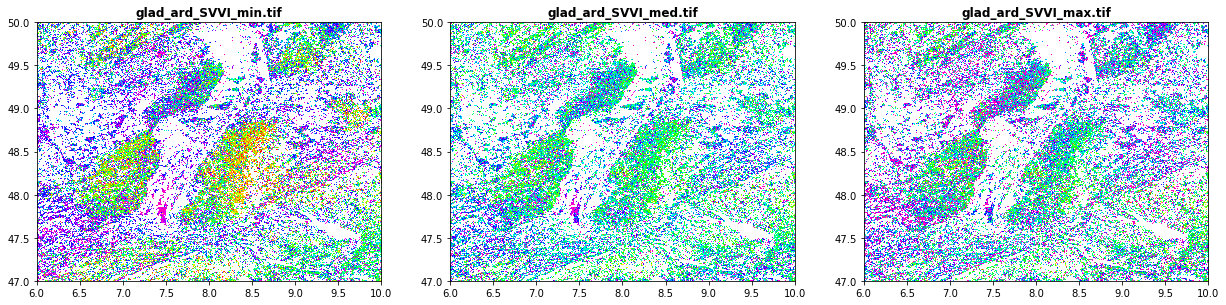

In [48]:
src1 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_min.tif")
src2 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_med.tif")
src3 = rasterio.open("tree_height/geodata_raster/glad_ard_SVVI_max.tif")
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show(src1, ax=src1p, title='glad_ard_SVVI_min.tif' , vmin=-500, vmax=+500, cmap='gist_rainbow' )
show(src2, ax=src2p, title='glad_ard_SVVI_med.tif' , vmin=-500, vmax=+500, cmap='gist_rainbow' )
show(src3, ax=src3p, title='glad_ard_SVVI_max.tif' , vmin=-500, vmax=+500, cmap='gist_rainbow' )

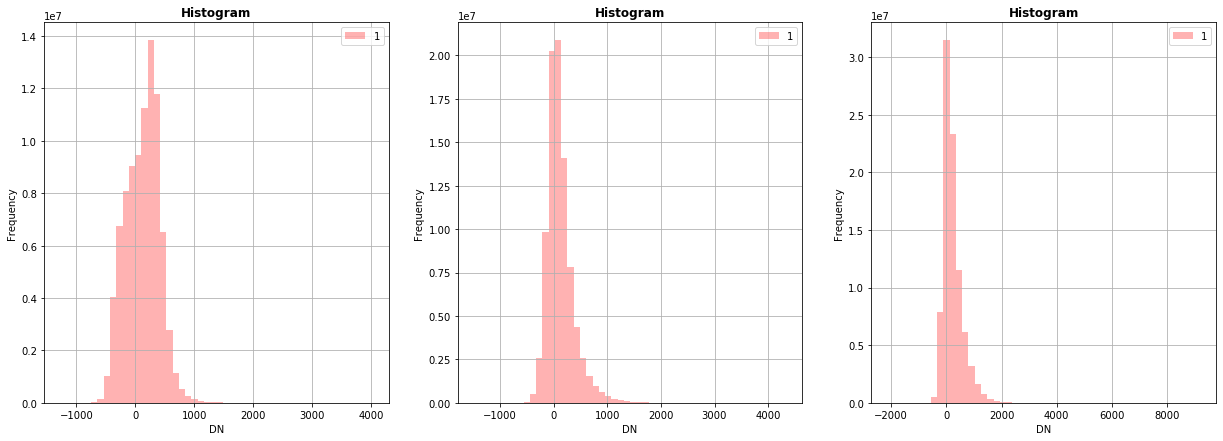

In [48]:
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_min.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_med.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="glad_ard_SVVI_max.tif")

**Climate data obained from the [CHELSA](https://chelsa-climate.org/bioclim/) dataset. 

* CHELSA_bio18.tif: mean monthly precipitation amount of the warmest quarter
* CHELSA_bio4.tif: temperature seasonality (standard deviation of the monthly mean temperatures)

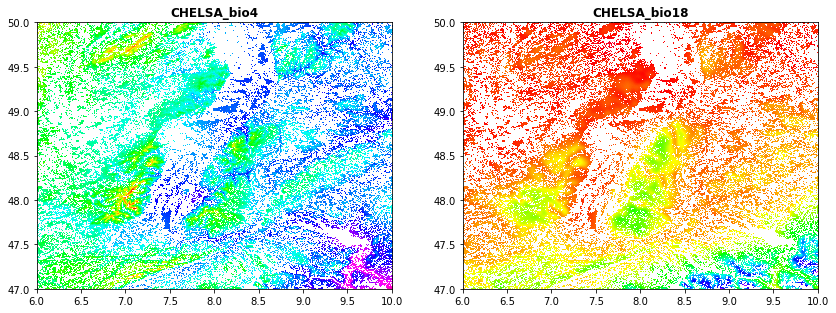

In [54]:
import rasterio
from rasterio.plot import show
src1 = rasterio.open("tree_height/geodata_raster/CHELSA_bio4.tif")
src2 = rasterio.open("tree_height/geodata_raster/CHELSA_bio18.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='CHELSA_bio4'  , cmap='gist_rainbow')
show((src2), ax=src2p, title='CHELSA_bio18' , cmap='gist_rainbow')

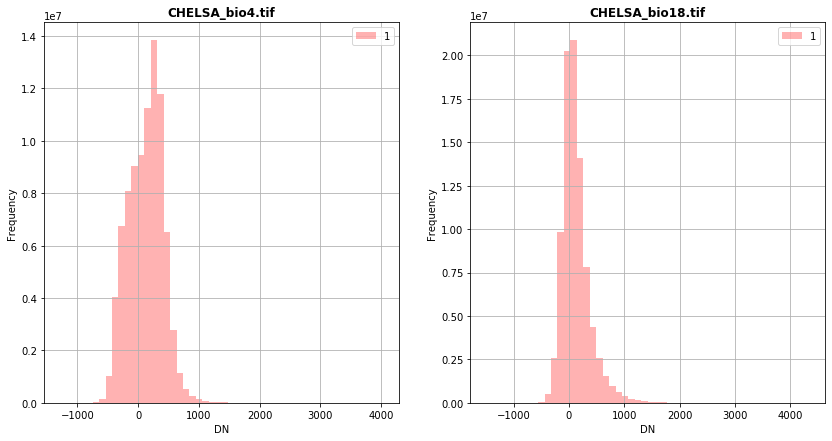

In [49]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CHELSA_bio4.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CHELSA_bio18.tif")

**Soil data obained from the [SOILGRID](https://soilgrids.org/)

* BLDFIE_WeigAver.tif: Bulk density (fine earth) in kg / cubic-meter (weigheted average as function for the depth)
* CECSOL_WeigAver.tif: Cation exchange capacity of soil in cmolc/kg (weigheted average as function for the depth)
* ORCDRC_WeigAver.tif: Soil organic carbon content (fine earth fraction) in g per kg (weigheted average as function for the depth)

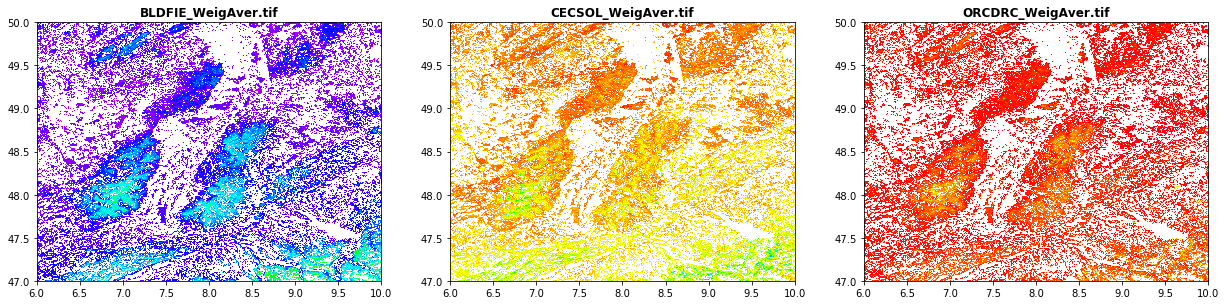

In [55]:
src1 = rasterio.open("tree_height/geodata_raster/BLDFIE_WeigAver.tif")
src2 = rasterio.open("tree_height/geodata_raster/CECSOL_WeigAver.tif")
src3 = rasterio.open("tree_height/geodata_raster/ORCDRC_WeigAver.tif")
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show(src1, ax=src1p, title='BLDFIE_WeigAver.tif' , cmap='gist_rainbow')
show(src2, ax=src2p, title='CECSOL_WeigAver.tif' , cmap='gist_rainbow')
show(src3, ax=src3p, title='ORCDRC_WeigAver.tif' , cmap='gist_rainbow')

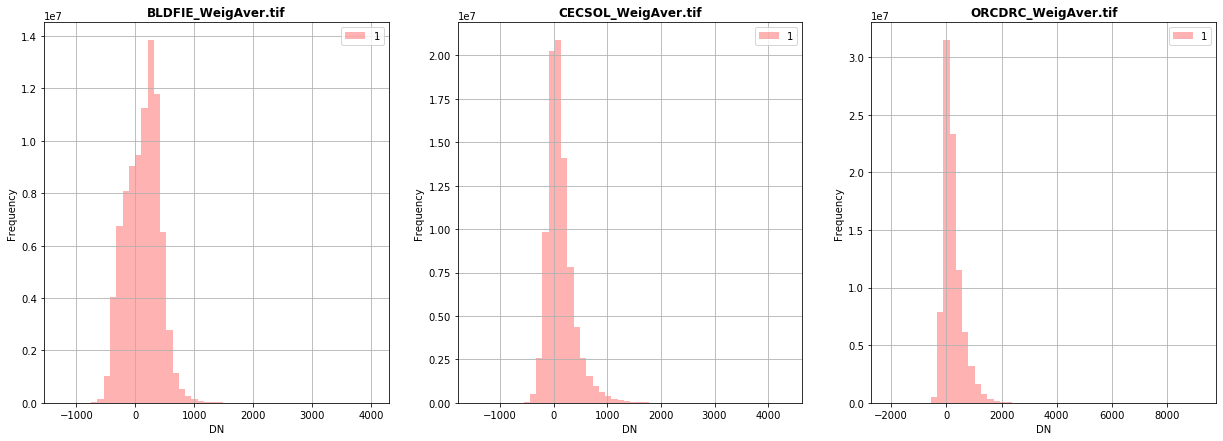

In [5]:
fig, (src1p,src2p,src3p) = pyplot.subplots(1,3, figsize=(21,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="BLDFIE_WeigAver.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="CECSOL_WeigAver.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="ORCDRC_WeigAver.tif")

**Geomorphological data obtained from [geomorpho90m](http://spatial-ecology.net/docs/build/html/GEODATA/geomorpho90m/geomorpho90m.html)**

* elev.tif: elevation
* convergence.tif: convergence 
* northness.tif: northness
* eastness.tif: eastness
* dev-magnitude.tif: Maximum multiscaledeviation

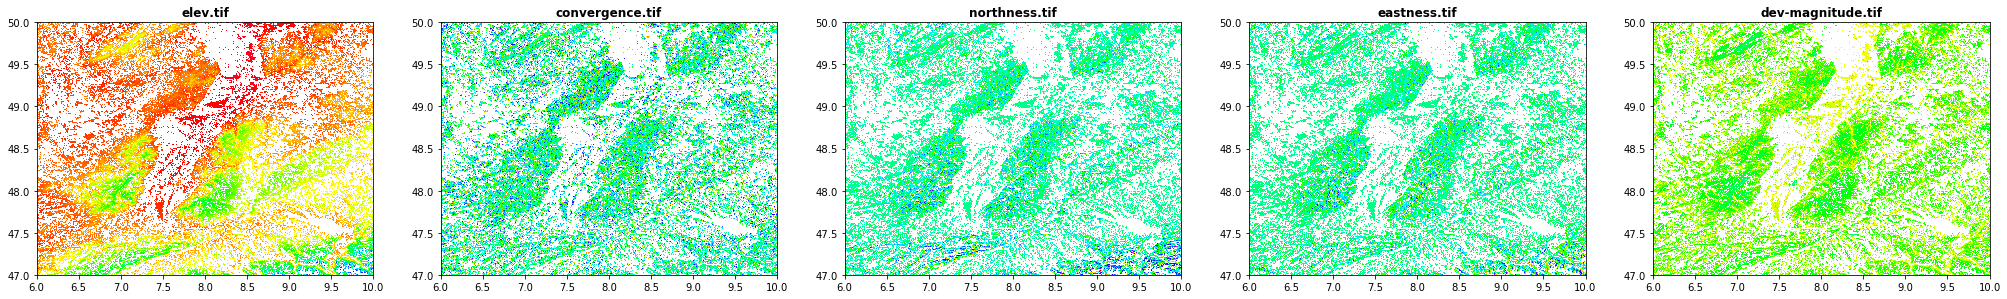

In [3]:
src1 = rasterio.open("tree_height/geodata_raster/elev.tif")
src2 = rasterio.open("tree_height/geodata_raster/convergence.tif")
src3 = rasterio.open("tree_height/geodata_raster/northness.tif")
src4 = rasterio.open("tree_height/geodata_raster/eastness.tif")
src5 = rasterio.open("tree_height/geodata_raster/dev-magnitude.tif")
fig, (src1p,src2p,src3p,src4p,src5p) = pyplot.subplots(1,5, figsize=(35,7))
show(src1, ax=src1p, title='elev.tif' ,  cmap='gist_rainbow')
show(src2, ax=src2p, title='convergence.tif' , cmap='gist_rainbow')
show(src3, ax=src3p, title='northness.tif' , cmap='gist_rainbow')
show(src4, ax=src4p, title='eastness.tif', cmap='gist_rainbow')
show(src5, ax=src5p, title='dev-magnitude.tif' , cmap='gist_rainbow')

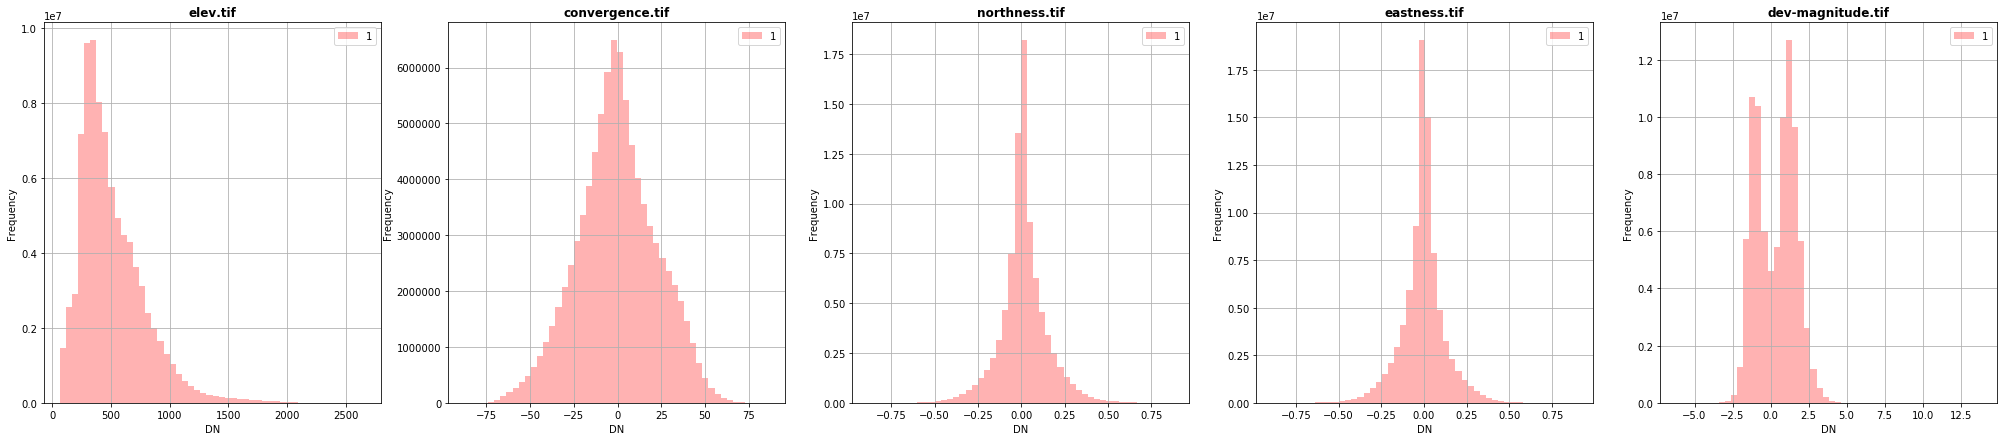

In [9]:
fig, (src1p,src2p,src3p,src4p,src5p) = pyplot.subplots(1,5, figsize=(35,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="elev.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="convergence.tif")
show_hist( src3, ax=src3p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="northness.tif")
show_hist( src4, ax=src4p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="eastness.tif")
show_hist( src5, ax=src5p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="dev-magnitude.tif")

**Geomorphological data obtained from [hydromorpho90m](https://essd.copernicus.org/preprints/essd-2022-9/)**

* cti.tif:Compound topographic index
* outlet_dist_dw_basin.tif: Distance between focal grid cell and the outlet grid cell in the network 

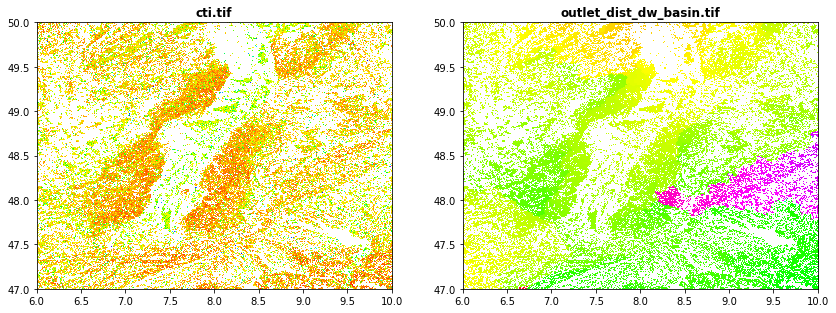

In [4]:
src1 = rasterio.open("tree_height/geodata_raster/cti.tif")
src2 = rasterio.open("tree_height/geodata_raster/outlet_dist_dw_basin.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='cti.tif' , cmap='gist_rainbow')
show((src2), ax=src2p, title='outlet_dist_dw_basin.tif' , cmap='gist_rainbow')

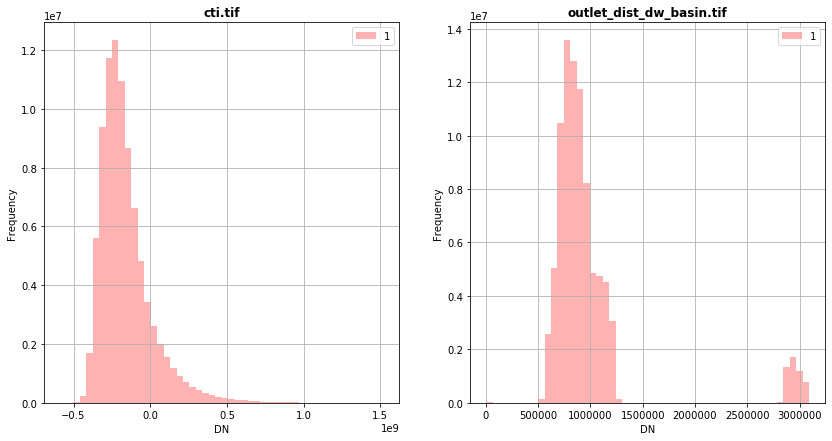

In [11]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="cti.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="outlet_dist_dw_basin.tif")

**Soil data obtained from [Global Soil Bioclimatic variables](https://zenodo.org/record/4558732#.YmqPg3VfiV4)**

* SBIO3_Isothermality_5_15cm.tif
* SBIO4_Temperature_Seasonality_5_15cm.tif

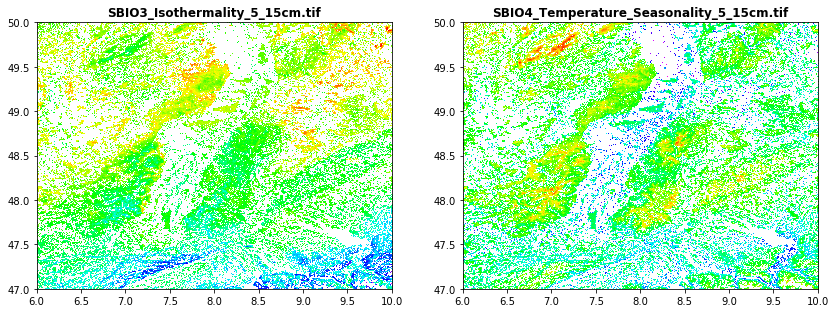

In [9]:
src1 = rasterio.open("tree_height/geodata_raster/SBIO3_Isothermality_5_15cm.tif")
src2 = rasterio.open("tree_height/geodata_raster/SBIO4_Temperature_Seasonality_5_15cm.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='SBIO3_Isothermality_5_15cm.tif', cmap='gist_rainbow')
show((src2), ax=src2p, title='SBIO4_Temperature_Seasonality_5_15cm.tif', cmap='gist_rainbow')

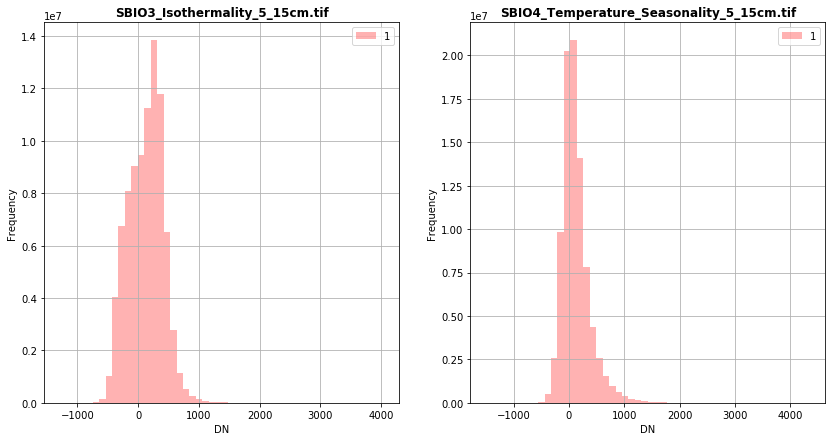

In [19]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="SBIO3_Isothermality_5_15cm.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="SBIO4_Temperature_Seasonality_5_15cm.tif")

**Forest cover in percentage obtained from [Global Forest Change](https://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.7.html)**

* treecover.tif: canopy cover in percentage

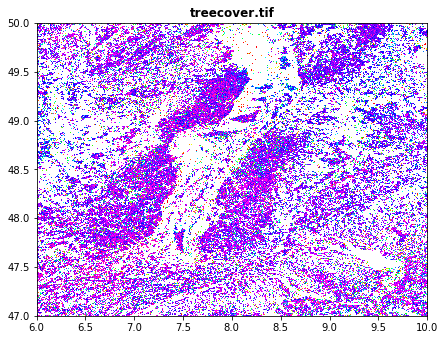

In [8]:
src1 = rasterio.open("tree_height/geodata_raster/treecover.tif")
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show((src1), ax=src1p, title='treecover.tif', vmin=0 , vmax=100 , cmap='gist_rainbow')

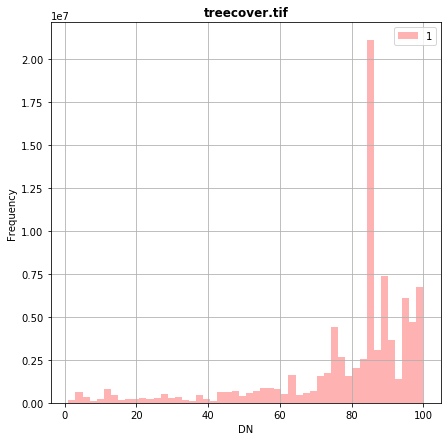

In [23]:
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="treecover.tif")

**Forest height in percentage obtained from [Forest Height](https://glad.umd.edu/dataset/gedi)**


The [Global Forest Canopy Height, 2019](https://glad.umd.edu/dataset/gedi) map has been release in 2020 (scientific publication https://doi.org/10.1016/j.rse.2020.112165). The authors use a regression tree model that was calibrated and applied to each individual Landsat GLAD ARD tile (1 × 1◦) in a “moving window” mode. Such tree height estimation is storede in forestheight.tiff and in the table as *forestheight* column.
We will try to beats such estimation using a more advance ML tecnques and different enviromental predictors that better express the ecolocacal condition.


* forestheight.tif

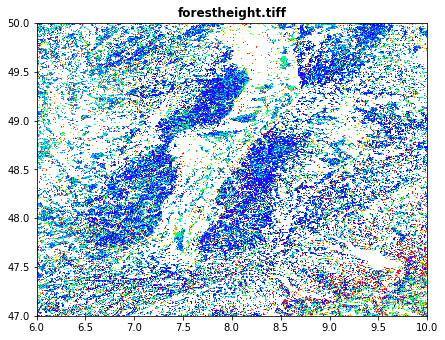

In [6]:
src1 = rasterio.open("tree_height/geodata_raster/forestheight.tif")
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show((src1), ax=src1p, title='forestheight.tiff' , cmap='gist_rainbow')

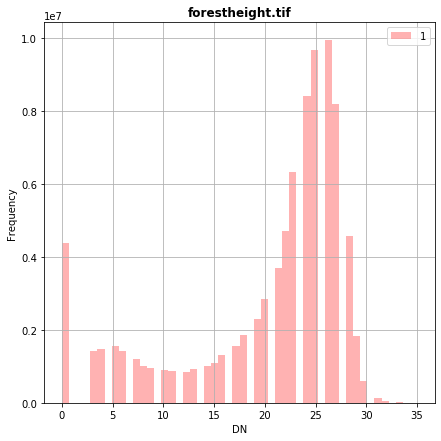

In [25]:
fig, (src1p) = pyplot.subplots(1,1, figsize=(7,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="forestheight.tif" , cmap='gist_rainbow' )

**Latitude and longittude obtained from GRASS (r.latlong)[https://grass.osgeo.org/grass78/manuals/r.latlong.html]**

* longitude.tif
* latitude.tif   

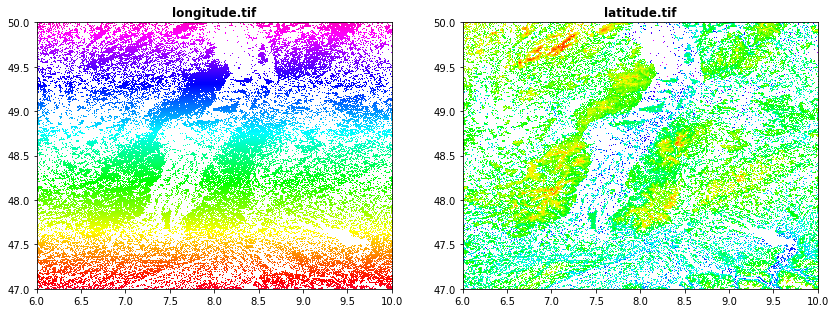

In [5]:
src1 = rasterio.open("tree_height/geodata_raster/longitude.tif")
src2 = rasterio.open("tree_height/geodata_raster/SBIO4_Temperature_Seasonality_5_15cm.tif")
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show((src1), ax=src1p, title='longitude.tif' , cmap='gist_rainbow')
show((src2), ax=src2p, title='latitude.tif' , cmap='gist_rainbow')

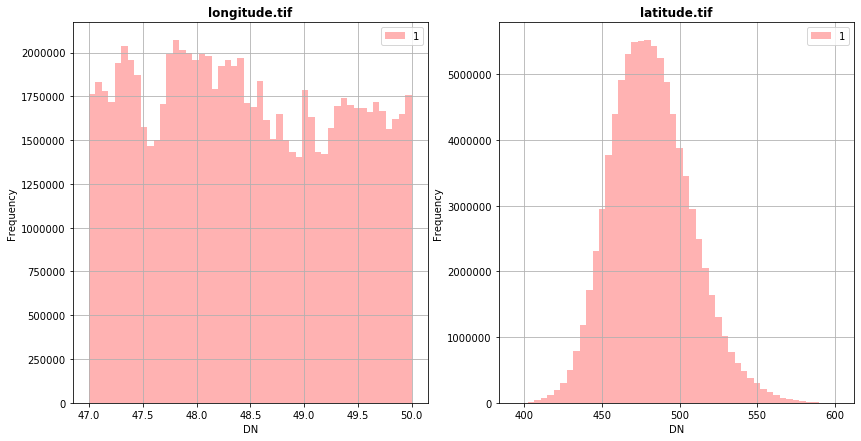

In [27]:
fig, (src1p,src2p) = pyplot.subplots(1,2, figsize=(14,7))
show_hist( src1, ax=src1p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="longitude.tif")
show_hist( src2, ax=src2p, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="latitude.tif")

**File storing enviromental predictors at each point location.**

In [26]:
predictors = pd.read_csv("tree_height/txt/eu_x_y_predictors_select.txt", sep=" ",  index_col=False)
pd.set_option('display.max_columns',None)
predictors.head(6)

ID         X          Y  BLDFIE_WeigAver  CECSOL_WeigAver  CHELSA_bio18  \
0   1  6.050001  49.727499             1540               13          2113   
1   2  6.050002  49.922155             1491               12          1993   
2   3  6.050002  48.602377             1521               17          2124   
3   4  6.050009  48.151979             1526               16          2569   
4   5  6.050010  49.588410             1547               14          2108   
5   6  6.050014  48.608456             1515               19          2124   

   CHELSA_bio4  convergence        cti  dev-magnitude  eastness        elev  \
0         5893   -10.486560 -238043120       1.158417  0.069094  353.983124   
1         5912    33.274361 -208915344      -1.755341  0.269112  267.511688   
2         5983     0.045293 -137479792       1.908780 -0.016055  389.751160   
3         6130   -33.654274 -267223072       0.965787  0.067767  380.207703   
4         5923    27.493824 -107809368      -0.162624  0.014065  308.042786   
5         6010    -1.602039   17384282       1.447979 -0.018912  364.527100   

   forestheight  glad_ard_SVVI_max  glad_ard_SVVI_med  glad_ard_SVVI_min  \
0            23         276.871094          46.444092         347.665405   
1            19         -49.526367          19.552734        -130.541748   
2            21          93.257324          50.743652         384.522461   
3            27         542.401367         202.264160         386.156738   
4            25         136.048340         146.835205         198.127441   
5            18         221.339844         247.387207         480.387939   

   northness  ORCDRC_WeigAver  outlet_dist_dw_basin  \
0   0.042500                9                780403   
1   0.182780               16                772777   
2   0.036253               14                898820   
3   0.005139               15                831824   
4   0.028847               17                796962   
5   0.042747               14                897945   

   SBIO3_Isothermality_5_15cm  SBIO4_Temperature_Seasonality_5_15cm  treecover  
0                   19.798992                            440.672211         85  
1                   20.889412                            457.756195         85  
2                   20.695877                            481.879700         62  
3                   19.375000                            479.410278         85  
4                   18.777500                            457.880066         85  
5                   19.398880                            474.331329         62

In [30]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
predictors.describe()

ID             X             Y  BLDFIE_WeigAver  \
count 1267239.00000 1267239.00000 1267239.00000    1267239.00000   
mean   633620.00000       7.96654      49.36511       1502.39574   
std    365820.53323       1.10181       0.46899         44.27063   
min         1.00000       6.05000      47.97635       1216.00000   
25%    316810.50000       7.02639      49.05567       1491.00000   
50%    633620.00000       7.84351      49.51040       1518.00000   
75%    950429.50000       8.97501      49.73179       1531.00000   
max   1267239.00000       9.95000      49.95000       1599.00000   

       CECSOL_WeigAver  CHELSA_bio18   CHELSA_bio4   convergence  \
count    1267239.00000 1267239.00000 1267239.00000 1267239.00000   
mean          13.68642    2310.15649    6293.88506      -0.14166   
std            2.21764     366.82038     224.88881      23.15530   
min            6.00000    1553.00000    5503.00000     -81.28032   
25%           12.00000    2078.00000    6149.00000     -15.25398   
50%           13.00000    2242.00000    6304.00000      -0.66545   
75%           15.00000    2457.00000    6477.00000      15.50443   
max           38.00000    4618.00000    6814.00000      79.13613   

                   cti  dev-magnitude      eastness          elev  \
count    1267239.00000  1267239.00000 1267239.00000 1267239.00000   
mean  -149126079.37575        0.25312      -0.00370     338.88664   
std    166804129.24955        1.31914       0.10254     130.18989   
min   -474056768.00000       -5.47250      -0.63450      82.19376   
25%   -259747944.00000       -0.99220      -0.05173     259.10744   
50%   -188826192.00000        0.46544      -0.00116     331.79755   
75%    -84776040.00000        1.31942       0.04273     408.29001   
max   1393578752.00000       11.05419       0.56048    1097.69751   

       forestheight  glad_ard_SVVI_max  glad_ard_SVVI_med  glad_ard_SVVI_min  \
count 1267239.00000      1267239.00000      1267239.00000      1267239.00000   
mean       20.75837          250.98824          119.72647          148.13463   
std         7.31751          349.75421          257.31665          267.01116   
min         0.00000         -865.58301         -699.90332         -842.19458   
25%        19.00000           16.96252          -43.99414          -37.99170   
50%        24.00000          162.78882           70.64990          182.67358   
75%        26.00000          405.89746          220.47534          324.65247   
max        34.00000         4506.54102         4149.77930         3570.01855   

          northness  ORCDRC_WeigAver  outlet_dist_dw_basin  \
count 1267239.00000    1267239.00000         1267239.00000   
mean        0.00737         13.97081          749213.04208   
std         0.10150          7.08598          100361.51781   
min        -0.52740          3.00000          540427.00000   
25%        -0.04133          9.00000          674957.00000   
50%         0.00359         12.00000          742105.00000   
75%         0.05970         16.00000          811864.00000   
max         0.55303        139.00000         1028934.00000   

       SBIO3_Isothermality_5_15cm  SBIO4_Temperature_Seasonality_5_15cm  \
count               1267239.00000                         1267239.00000   
mean                     19.79155                             476.60503   
std                       1.31156                              27.05428   
min                      14.61014                             394.21213   
25%                      18.90800                             458.58015   
50%                      19.76031                             473.55383   
75%                      20.62271                             491.08063   
max                      26.08103                             598.17474   

          treecover  
count 1267239.00000  
mean       77.64616  
std        21.02552  
min         1.00000  
25%        75.00000  
50%        85.00000  
75%        89.00000  
max       100.00000